# **Libraries**

In [ ]:
from google.colab import drive  # Access Google Drive in Google Colab
from google.colab import files
import zipfile  # Handle zip files
import os  # Interact with the operating system
import matplotlib.pyplot as plt  # Create visualizations, graphs, and plots
import matplotlib.image as mpimg  # Read and manipulate images
import cv2  # Image and video manipulation using OpenCV
import shutil  # File and directory operations, like deletion or moving
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator  # Perform data augmentation on images
import tensorflow as tf  # Main library for numerical computations using ML and DL algorithms
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Layers used in NN models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  # Callbacks used in model training
from google.colab import files  # Upload and download files in Colab
import numpy as np  # Array operations and numerical computations
from tensorflow.keras.preprocessing import image
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report  # Evaluation metrics for machine learning models

# **Preparing Dataset**

## **Load Dataset**

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path to file ZIP in Google Drive
zip_path = '/content/drive/MyDrive/BotaniScan7/pepper_bell.zip'

Mounted at /content/drive


In [ ]:
# Extract zip file
! unzip "/content/drive/MyDrive/BotaniScan7/pepper_bell.zip" -d .

## **Classes**

In [ ]:
pepperbell_data = "/content/pepper_bell"
pepperbell_classes = os.listdir(pepperbell_data)

In [ ]:
print("Pepper Bell Classes:")
for classes in pepperbell_classes:
    if os.path.isdir(os.path.join(pepperbell_data, classes)):
        print(classes)

Pepper Bell Classes:
Pepper__bell___healthy
Not__Pepper__bell
Pepper__bell___Bacterial_spot


## **Preview Image Dataset**


Pepper__bell___healthy
Total Images: 1478
Resolution of First Image: (256, 256, 3)


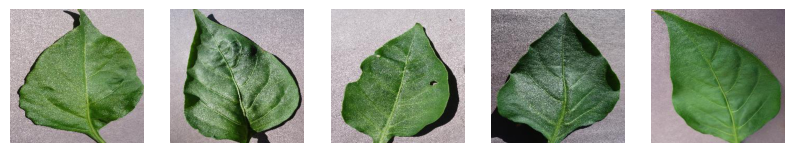


Not__Pepper__bell
Total Images: 1960
Resolution of First Image: (255, 170, 3)


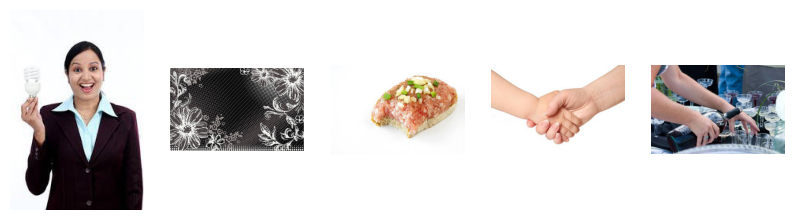


Pepper__bell___Bacterial_spot
Total Images: 997
Resolution of First Image: (256, 256, 3)


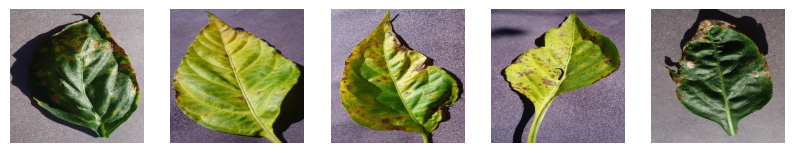

In [ ]:
for item in pepperbell_classes:
  print("")
  print(item)
  class_dir = os.path.join(pepperbell_data, item)
  class_images = os.listdir(class_dir)
  
  # Total images in each classes
  num_images = len(class_images)
  print("Total Images:", num_images)
  
  # Resolution/size of each first image in class
  img_path = os.path.join(class_dir, class_images[0])
  img = mpimg.imread(img_path)
  image_shape = img.shape
  print("Resolution of First Image:", image_shape)
  
  # Showing some images
  plt.figure(figsize=(10, 5))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

## **Preprocessing Dataset**

In [ ]:
# New Directory for Resized Dataset
resized_dir = "/content/drive/MyDrive/BotaniScan7/resized"
os.makedirs(resized_dir, exist_ok=True)

# Pixel Normalization
def normalize_image(image):
    normalized_image = image.astype(np.float32) / 255.0
    return normalized_image

for item in pepperbell_classes:
    class_dir = os.path.join(pepperbell_data, item)
    class_images = os.listdir(class_dir)

    for img_path in class_images:
        img = Image.open(os.path.join(class_dir, img_path))
        resized_img = img.resize((224, 224))
        normalized_img = normalize_image(np.array(resized_img))

        # Save Image to resized_dir
        save_path = os.path.join(resized_dir, item, img_path)
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        Image.fromarray((normalized_img * 255).astype(np.uint8)).save(save_path)


In [ ]:
# New Directory for Balanced Dataset
balanced_dir = "/content/drive/MyDrive/BotaniScan7/balanced"

# Number of Images to Be Selected from Each Class
num_images_per_class = min(len(os.listdir(resized_dir+"/Pepper__bell___Bacterial_spot")),
                           len(os.listdir(resized_dir+"/Not__Pepper__bell")),
                           len(os.listdir(resized_dir+"/Pepper__bell___healthy")))

# Create New Directory in balanced_dir
os.makedirs(balanced_dir+"/Pepper__bell___Bacterial_spot", exist_ok=True)
os.makedirs(balanced_dir+"/Not__Pepper__bell", exist_ok=True)
os.makedirs(balanced_dir+"/Pepper__bell___healthy", exist_ok=True)

# Select Some Images from Each Class and Copy to balanced_dir
selected_images = os.listdir(resized_dir+"/Pepper__bell___Bacterial_spot")[:num_images_per_class]
for image in selected_images:
    shutil.copy(os.path.join(resized_dir+"/Pepper__bell___Bacterial_spot", image), balanced_dir+"/Pepper__bell___Bacterial_spot")

selected_images = os.listdir(resized_dir+"/Not__Pepper__bell")[:num_images_per_class]
for image in selected_images:
    shutil.copy(os.path.join(resized_dir+"/Not__Pepper__bell", image), balanced_dir+"/Not__Pepper__bell")

selected_images = os.listdir(resized_dir+"/Pepper__bell___healthy")[:num_images_per_class]
for image in selected_images:
    shutil.copy(os.path.join(resized_dir+"/Pepper__bell___healthy", image), balanced_dir+"/Pepper__bell___healthy")



Pepper__bell___healthy
Total Images: 997
Resolution of First Image: (224, 224, 3)


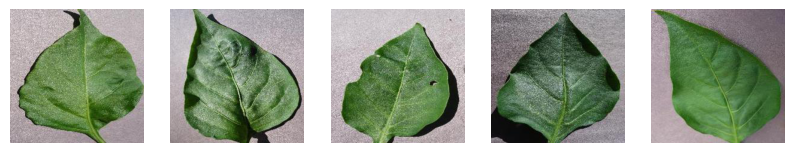


Not__Pepper__bell
Total Images: 997
Resolution of First Image: (224, 224, 3)


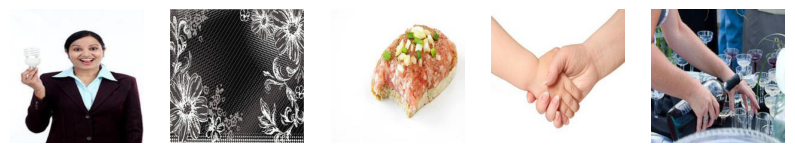


Pepper__bell___Bacterial_spot
Total Images: 997
Resolution of First Image: (224, 224, 3)


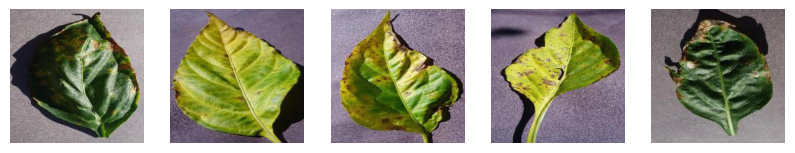

In [ ]:
# Preview Image from Balanced Dataset
for item in pepperbell_classes:
  print("")
  print(item)
  class_dir = os.path.join(balanced_dir, item)
  class_images = os.listdir(class_dir)

  # Total images in each classes
  num_images = len(class_images)
  print("Total Images:", num_images)

  # Resolution/size of each first image in class
  img_path = os.path.join(class_dir, class_images[0])
  img = mpimg.imread(img_path)
  image_shape = img.shape
  print("Resolution of First Image:", image_shape)

  # Showing some images
  plt.figure(figsize=(10, 5))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

# **Building Detection Model**

## **Split Data into Train, Validation, and Test**

In [ ]:
# Train, Validation, and Test Directory
train_dir = '/content/drive/MyDrive/BotaniScan7/train'
validation_dir = '/content/drive/MyDrive/BotaniScan7/val'
test_dir = '/content/drive/MyDrive/BotaniScan7/test'

# Split Data into Training, Validation, and Test
class_directories = os.listdir(balanced_dir)
for class_directory in class_directories:
    class_path = os.path.join(balanced_dir, class_directory)
    if os.path.isdir(class_path):
        train_class_dir = os.path.join(train_dir, class_directory)
        os.makedirs(train_class_dir, exist_ok=True)
        val_class_dir = os.path.join(validation_dir, class_directory)
        os.makedirs(val_class_dir, exist_ok=True)
        test_class_dir = os.path.join(test_dir, class_directory)
        os.makedirs(test_class_dir, exist_ok=True)
        
        class_images = os.listdir(class_path)
        train_images, test_images = train_test_split(class_images, test_size=0.3, random_state=42)
        val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)
        
        for image in train_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(train_class_dir, image)
            shutil.copy(src, dst)
            
        for image in val_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(val_class_dir, image)
            shutil.copy(src, dst)
            
        for image in test_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(test_class_dir, image)
            shutil.copy(src, dst)

In [ ]:
train_image_count = 0
validation_image_count = 0
test_image_count = 0

# Count image in Train Directory
for root, dirs, files in os.walk(train_dir):
    train_image_count += len(files)

# Count image in Validation Directory
for root, dirs, files in os.walk(validation_dir):
    validation_image_count += len(files)

# Count image in Test Directory
for root, dirs, files in os.walk(test_dir):
    test_image_count += len(files)

# Show Total Image in Directory
print(f"Total Train Images: {train_image_count} images")
print(f"Total Validation Images: {validation_image_count} images")
print(f"Total Test Images: {test_image_count} images")

Total Train Images: 2091 images
Total Validation Images: 450 images
Total Test Images: 450 images


## **Training and Validation Generator**

In [ ]:
# Image Data Generator
datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=20,  # Image rotation up to 20 degrees
    width_shift_range=0.2,  # The horizontal shift of the image is 0.2
    height_shift_range=0.2,  # The vertical shift of the image is 0.2
    shear_range=0.2,  # Image stretch by 0.2
    zoom_range=0.2,  # The image magnification is 0.2
    horizontal_flip=True,  # Image horizontal inversion
    vertical_flip=True  # Image vertical inversion
)

# Train Generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical'
)

# Validation Generator
validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical'
)

Found 2091 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


## **Building Basic Model (Model 1)**

### **Model Architecture**

In [ ]:
# Load MobileNet Model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze Base Model Layer
base_model.trainable = False

# Add custom classification layers on top
my_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

my_model.summary()

17225924/17225924 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                         

### **Training and Evaluation of Model**

In [ ]:
# Define Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True),
]

# Compile Model
my_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train Model with callbacks
history = my_model.fit(
    train_generator, 
    epochs=50,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=callbacks
)

# Evaluate the Model
test_loss, test_accuracy = my_model.evaluate(validation_generator, steps=len(validation_generator))
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Epoch 1/50
21/21 [==============================] - 53s 2s/step - loss: 0.6498 - accuracy: 0.7370 - val_loss: 0.1618 - val_accuracy: 0.9556
Epoch 2/50
21/21 [==============================] - 40s 2s/step - loss: 0.1968 - accuracy: 0.9240 - val_loss: 0.1011 - val_accuracy: 0.9689
Epoch 3/50
21/21 [==============================] - 42s 2s/step - loss: 0.1391 - accuracy: 0.9488 - val_loss: 0.0736 - val_accuracy: 0.9778
Epoch 4/50
21/21 [==============================] - 42s 2s/step - loss: 0.1018 - accuracy: 0.9632 - val_loss: 0.0681 - val_accuracy: 0.9733
Epoch 5/50
21/21 [==============================] - 39s 2s/step - loss: 0.0943 - accuracy: 0.9646 - val_loss: 0.0686 - val_accuracy: 0.9733
Epoch 6/50
21/21 [==============================] - 39s 2s/step - loss: 0.0826 - accuracy: 0.9713 - val_loss: 0.0640 - val_accuracy: 0.9778
Epoch 7/50
21/21 [==============================] - 38s 2s/step - loss: 0.0861 - accuracy: 0.9651 - val_loss: 0.0600 - val_accuracy: 0.9800
Epoch 8/50
21/21 [==

### **Visualization of Accuracy and Loss & Confusion Matrix**

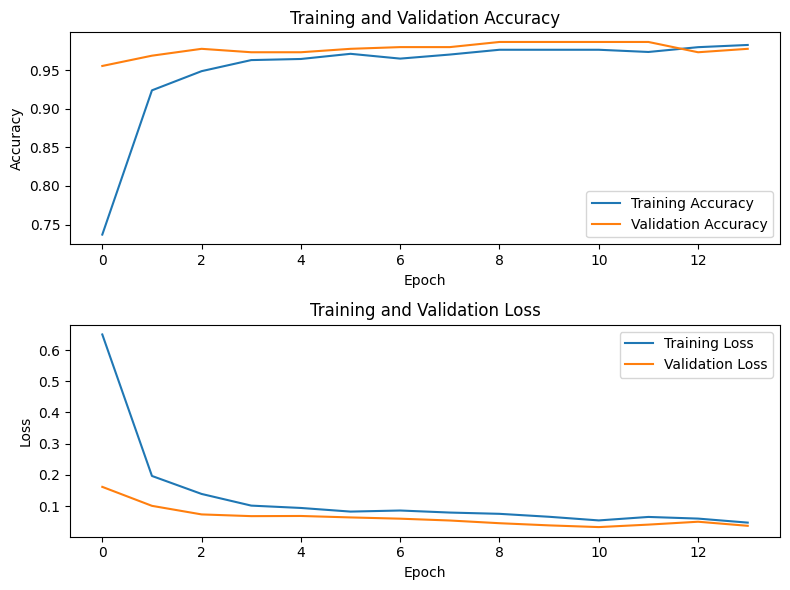

In [ ]:
# Plotting Accuracy and Loss
plt.figure(figsize=(8, 6))

# Plotting Accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Maintain spacing between subplots
plt.tight_layout()
plt.show()

In [ ]:
# Image Data Generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Test Generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the Model on Test Set
loss, accuracy = my_model.evaluate(test_generator, steps=len(test_generator))
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Found 450 images belonging to 3 classes.
5/5 [==============================] - 2s 309ms/step - loss: 0.0895 - accuracy: 0.9822
Test Loss: 0.08947057276964188
Test Accuracy: 0.9822221994400024


5/5 [==============================] - 2s 343ms/step


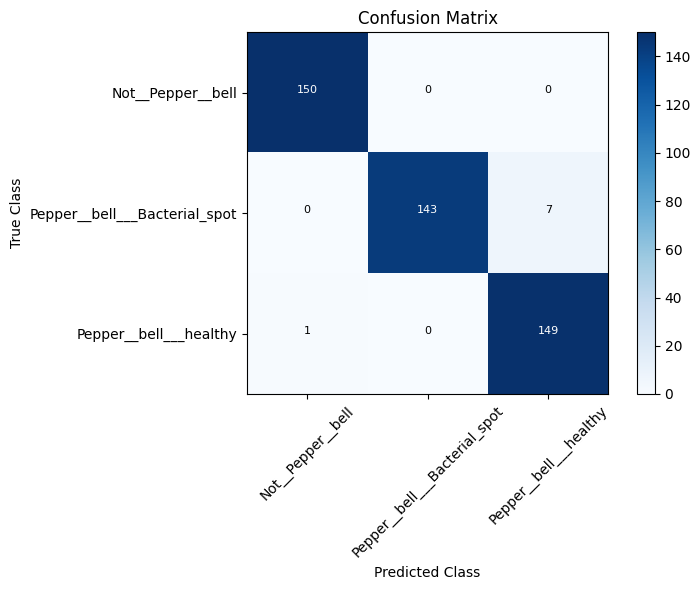

In [ ]:
y_pred = np.argmax(my_model.predict(test_generator), axis=1)
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=8)
           
plt.tight_layout()

# Showing Plot Confusion Matrix
plt.show()

In [ ]:
# Classification Report
cr = classification_report(y_true, y_pred, target_names=test_generator.class_indices)

# Showing Classification Report
print('Classification Report:')
print(cr)

Classification Report:
                               precision    recall  f1-score   support

            Not__Pepper__bell       0.99      1.00      1.00       150
Pepper__bell___Bacterial_spot       1.00      0.95      0.98       150
       Pepper__bell___healthy       0.96      0.99      0.97       150

                     accuracy                           0.98       450
                    macro avg       0.98      0.98      0.98       450
                 weighted avg       0.98      0.98      0.98       450



### **Testing Prediction using Model 1**

Saving fa421fcb-ba24-4562-bf15-0ba854194d70___JR_HL 7641.JPG to fa421fcb-ba24-4562-bf15-0ba854194d70___JR_HL 7641.JPG
1/1 [==============================] - 1s 1s/step


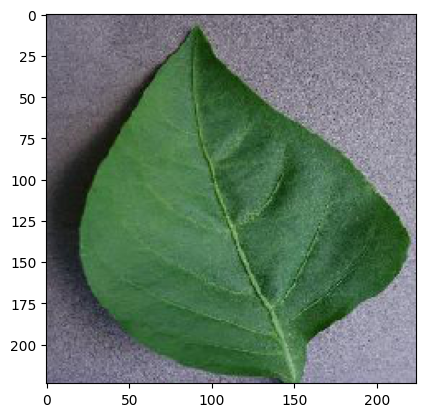

Pepper__bell___healthy: 99.99%


In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files

labels = list(train_generator.class_indices.keys())

upload = files.upload()

for fn in upload.keys():
    path = fn
    img = image.load_img(fn, target_size=(224, 224))
    x = image.img_to_array(img)
    x = x / 255.0  
    x = np.expand_dims(x, axis=0)

    # Make predictions
    predictions = my_model.predict(x)
    
    plt.imshow(img)
    plt.show()
    
    for pred in predictions:
        # Find Class with Highest percentage
        max_index = np.argmax(pred)
        max_label = labels[max_index]
        max_percentage = pred[max_index] * 100

        print("{}: {:.2f}%".format(max_label, max_percentage))

Saving e90ac690-4fbd-4ded-94f2-af7373479164___JR_B.Spot 8931.JPG to e90ac690-4fbd-4ded-94f2-af7373479164___JR_B.Spot 8931.JPG
1/1 [==============================] - 0s 24ms/step


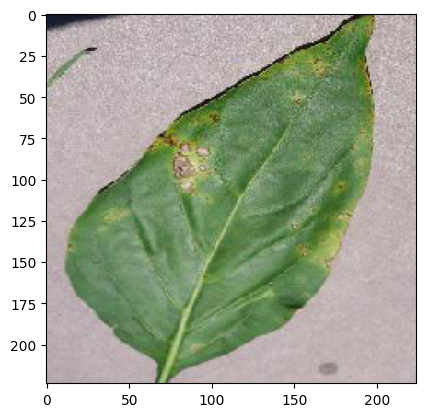

Pepper__bell___Bacterial_spot: 99.82%


In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files


labels = list(train_generator.class_indices.keys())

upload = files.upload()

for fn in upload.keys():
    path = fn
    img = image.load_img(fn, target_size=(224, 224))
    x = image.img_to_array(img)
    x = x / 255.0  
    x = np.expand_dims(x, axis=0)

    # Make predictions
    predictions = my_model.predict(x)
    
    plt.imshow(img)
    plt.show()
    
    for pred in predictions:
        # Find Class with Highest percentage
        max_index = np.argmax(pred)
        max_label = labels[max_index]
        max_percentage = pred[max_index] * 100

        print("{}: {:.2f}%".format(max_label, max_percentage))

Saving 60.jpg to 60.jpg
1/1 [==============================] - 0s 25ms/step


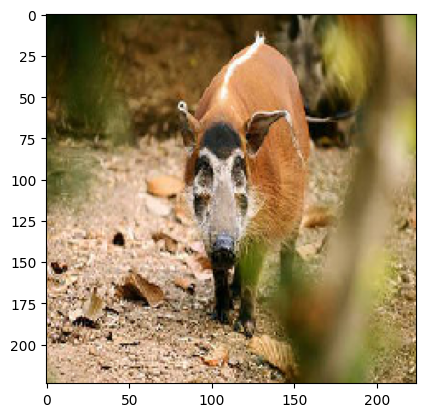

Not__Pepper__bell: 100.00%


In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files

labels = list(train_generator.class_indices.keys())

upload = files.upload()

for fn in upload.keys():
    path = fn
    img = image.load_img(fn, target_size=(224, 224))
    x = image.img_to_array(img)
    x = x / 255.0  
    x = np.expand_dims(x, axis=0)

    # Make predictions
    predictions = my_model.predict(x)
    
    plt.imshow(img)
    plt.show()
    
    for pred in predictions:
        # Find Class with Highest percentage
        max_index = np.argmax(pred)
        max_label = labels[max_index]
        max_percentage = pred[max_index] * 100

        print("{}: {:.2f}%".format(max_label, max_percentage))

Saving ilustrasi-daun-singkong_169.jpeg to ilustrasi-daun-singkong_169 (1).jpeg
1/1 [==============================] - 0s 32ms/step


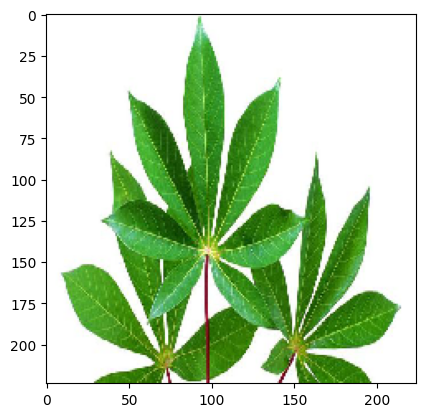

Not__Pepper__bell: 99.79%


In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files

labels = list(train_generator.class_indices.keys())

upload = files.upload()

for fn in upload.keys():
    path = fn
    img = image.load_img(fn, target_size=(224, 224))
    x = image.img_to_array(img)
    x = x / 255.0  
    x = np.expand_dims(x, axis=0)

    # Make predictions
    predictions = my_model.predict(x)
    
    plt.imshow(img)
    plt.show()
    
    for pred in predictions:
        # Find Class with Highest percentage
        max_index = np.argmax(pred)
        max_label = labels[max_index]
        max_percentage = pred[max_index] * 100

        print("{}: {:.2f}%".format(max_label, max_percentage))

### **Saving Model 1**

In [ ]:
my_model.save("pepperbell_model_1.h5")
tf.keras.models.save_model(my_model, 'pepperbell_model_1.hdf5')

In [ ]:
from google.colab import files

model_file_path = "pepperbell_model_1.h5"
files.download(model_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Building Model (Model 2)**

### **Model Architecture**

In [ ]:
my_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  
])

my_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)      

In [ ]:
# Define Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('best_model_2.h5', save_best_only=True),
]

# Compile Model
my_model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train Model with callbacks
history2 = my_model_2.fit(
    train_generator, 
    epochs=50,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=callbacks
)

# Evaluate the Model
test_loss, test_accuracy = my_model_2.evaluate(validation_generator, steps=len(validation_generator))
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Epoch 1/50
21/21 [==============================] - 44s 2s/step - loss: 0.3628 - accuracy: 0.9130 - val_loss: 0.1351 - val_accuracy: 0.9578
Epoch 2/50
21/21 [==============================] - 40s 2s/step - loss: 0.1220 - accuracy: 0.9589 - val_loss: 0.1031 - val_accuracy: 0.9667
Epoch 3/50
21/21 [==============================] - 40s 2s/step - loss: 0.0784 - accuracy: 0.9732 - val_loss: 0.0999 - val_accuracy: 0.9622
Epoch 4/50
21/21 [==============================] - 40s 2s/step - loss: 0.0832 - accuracy: 0.9727 - val_loss: 0.0675 - val_accuracy: 0.9778
Epoch 5/50
21/21 [==============================] - 42s 2s/step - loss: 0.0581 - accuracy: 0.9775 - val_loss: 0.0458 - val_accuracy: 0.9889
Epoch 6/50
21/21 [==============================] - 42s 2s/step - loss: 0.0329 - accuracy: 0.9900 - val_loss: 0.0212 - val_accuracy: 0.9933
Epoch 7/50
21/21 [==============================] - 39s 2s/step - loss: 0.0342 - accuracy: 0.9880 - val_loss: 0.0447 - val_accuracy: 0.9889
Epoch 8/50
21/21 [==

### **Visualization of Accuracy and Loss & Confusion Matrix**

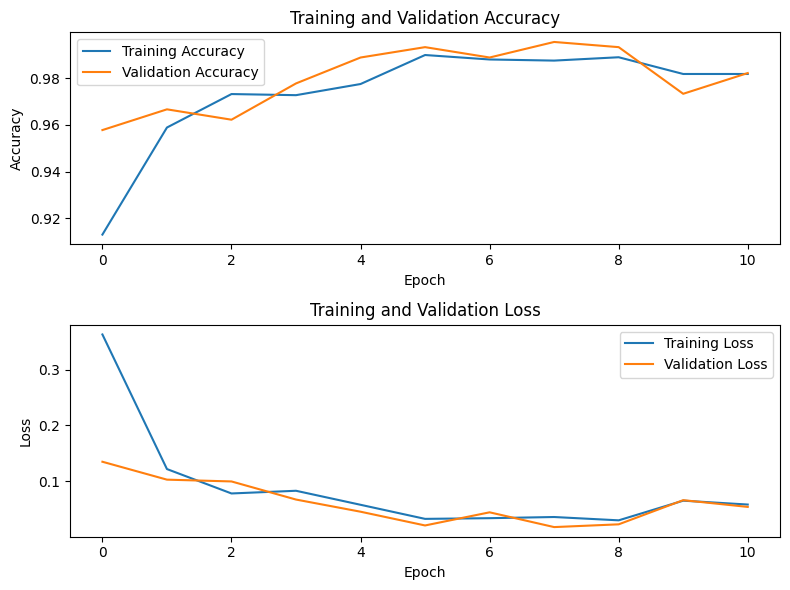

In [ ]:
# Plotting Accuracy and Loss
plt.figure(figsize=(8, 6))

# Plotting Accuracy
plt.subplot(2, 1, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(2, 1, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Maintain spacing between subplots
plt.tight_layout()
plt.show()

In [ ]:
# Image Data Generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Test Generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the Model on Test Set
loss, accuracy = my_model_2.evaluate(test_generator, steps=len(test_generator))
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Found 450 images belonging to 3 classes.
5/5 [==============================] - 4s 636ms/step - loss: 0.0446 - accuracy: 0.9911
Test Loss: 0.04463837668299675
Test Accuracy: 0.9911110997200012


5/5 [==============================] - 3s 460ms/step


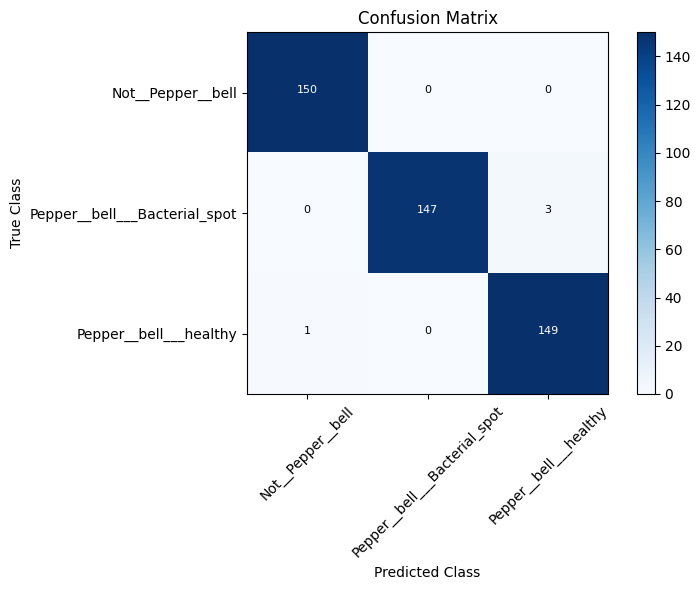

In [ ]:
y_pred = np.argmax(my_model_2.predict(test_generator), axis=1)
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=8)
           
plt.tight_layout()

# Showing Plot Confusion Matrix
plt.show()

In [ ]:
# Classification Report
cr = classification_report(y_true, y_pred, target_names=test_generator.class_indices)

# Showing Classification Report
print('Classification Report:')
print(cr)

Classification Report:
                               precision    recall  f1-score   support

            Not__Pepper__bell       0.99      1.00      1.00       150
Pepper__bell___Bacterial_spot       1.00      0.98      0.99       150
       Pepper__bell___healthy       0.98      0.99      0.99       150

                     accuracy                           0.99       450
                    macro avg       0.99      0.99      0.99       450
                 weighted avg       0.99      0.99      0.99       450



### **Testing Prediction using Model 2**

Saving f5e369a3-421e-43b9-ab00-840e7535a5eb___JR_HL 8076.JPG to f5e369a3-421e-43b9-ab00-840e7535a5eb___JR_HL 8076.JPG
1/1 [==============================] - 0s 311ms/step


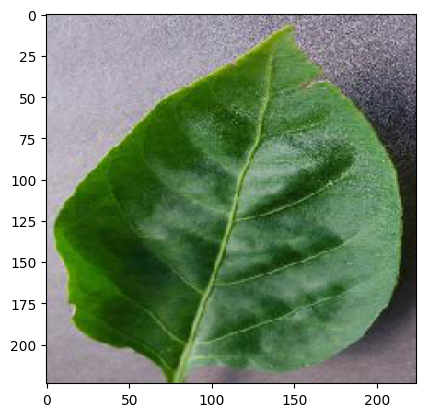

Pepper__bell___healthy: 99.98%


In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files

labels = list(train_generator.class_indices.keys())

upload = files.upload()

for fn in upload.keys():
    path = fn
    img = image.load_img(fn, target_size=(224, 224))
    x = image.img_to_array(img)
    x = x / 255.0  
    x = np.expand_dims(x, axis=0)

    # Make predictions
    predictions = my_model_2.predict(x)
    
    plt.imshow(img)
    plt.show()
    
    for pred in predictions:
        # Find Class with Highest percentage
        max_index = np.argmax(pred)
        max_label = labels[max_index]
        max_percentage = pred[max_index] * 100

        print("{}: {:.2f}%".format(max_label, max_percentage))

Saving e71b39c4-8007-46c0-a925-adaf30e71fd1___JR_B.Spot 9054.JPG to e71b39c4-8007-46c0-a925-adaf30e71fd1___JR_B.Spot 9054.JPG
1/1 [==============================] - 0s 22ms/step


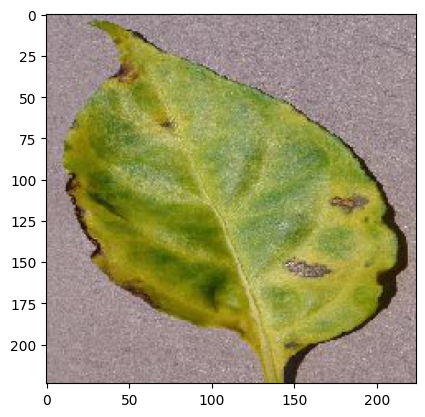

Pepper__bell___Bacterial_spot: 99.96%


In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files

labels = list(train_generator.class_indices.keys())

upload = files.upload()

for fn in upload.keys():
    path = fn
    img = image.load_img(fn, target_size=(224, 224))
    x = image.img_to_array(img)
    x = x / 255.0  
    x = np.expand_dims(x, axis=0)

    # Make predictions
    predictions = my_model_2.predict(x)
    
    plt.imshow(img)
    plt.show()
    
    for pred in predictions:
        # Find Class with Highest percentage
        max_index = np.argmax(pred)
        max_label = labels[max_index]
        max_percentage = pred[max_index] * 100

        print("{}: {:.2f}%".format(max_label, max_percentage))

Saving 60.jpg to 60 (1).jpg
1/1 [==============================] - 0s 19ms/step


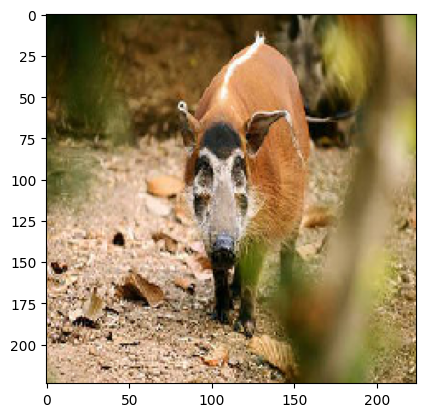

Not__Pepper__bell: 100.00%


In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files

labels = list(train_generator.class_indices.keys())

upload = files.upload()

for fn in upload.keys():
    path = fn
    img = image.load_img(fn, target_size=(224, 224))
    x = image.img_to_array(img)
    x = x / 255.0  
    x = np.expand_dims(x, axis=0)

    # Make predictions
    predictions = my_model_2.predict(x)
    
    plt.imshow(img)
    plt.show()
    
    for pred in predictions:
        # Find Class with Highest percentage
        max_index = np.argmax(pred)
        max_label = labels[max_index]
        max_percentage = pred[max_index] * 100

        print("{}: {:.2f}%".format(max_label, max_percentage))

Saving ilustrasi-daun-singkong_169.jpeg to ilustrasi-daun-singkong_169 (2).jpeg
1/1 [==============================] - 0s 24ms/step


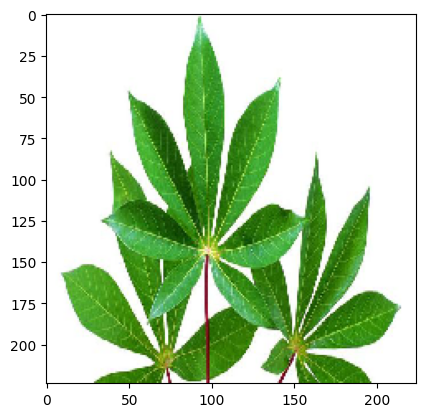

Not__Pepper__bell: 100.00%


In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files

labels = list(train_generator.class_indices.keys())

upload = files.upload()

for fn in upload.keys():
    path = fn
    img = image.load_img(fn, target_size=(224, 224))
    x = image.img_to_array(img)
    x = x / 255.0  
    x = np.expand_dims(x, axis=0)

    # Make predictions
    predictions = my_model_2.predict(x)
    
    plt.imshow(img)
    plt.show()
    
    for pred in predictions:
        # Find Class with Highest percentage
        max_index = np.argmax(pred)
        max_label = labels[max_index]
        max_percentage = pred[max_index] * 100

        print("{}: {:.2f}%".format(max_label, max_percentage))

### **Saving Model 2**

In [ ]:
my_model_2.save("pepperbell_model_2.h5")
tf.keras.models.save_model(my_model_2, 'pepperbell_model_2.hdf5')

In [ ]:
from google.colab import files

model_file_path = "pepperbell_model_2.h5"
files.download(model_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>